Assignment

Submitted by:

Rishi Bhardwaj

102303424

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [11]:
df = pd.read_csv("/content/data.csv", encoding="latin1", low_memory=False)

# Extract NO2 feature (x)
x = df["no2"].dropna().values

In [12]:
r = 102303424

a_r = 0.05 * (r % 7)
b_r = 0.3 * ((r % 5) + 1)

In [13]:
z = x + a_r * np.sin(b_r * x)


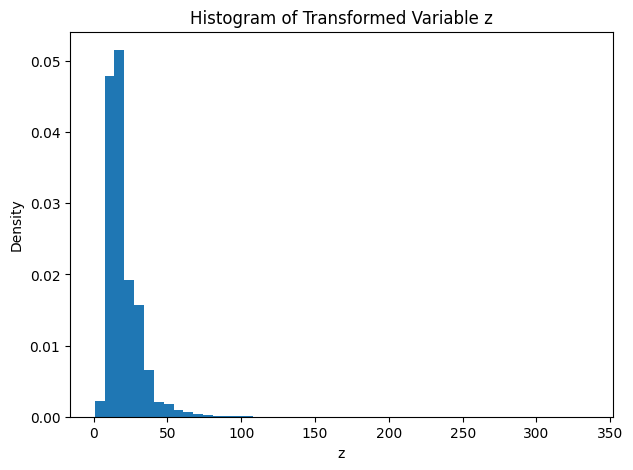

In [14]:
plt.figure(figsize=(7,5))
plt.hist(z, bins=50, density=True)
plt.xlabel("z")
plt.ylabel("Density")
plt.title("Histogram of Transformed Variable z")
plt.show()

In [15]:
def pdf_model(z, lambd, mu, c):
    return c * np.exp(-lambd * (z - mu)**2)

In [16]:
hist_vals, bin_edges = np.histogram(z, bins=50, density=True)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

initial_guess = [0.1, np.mean(z), 1.0]

params, _ = curve_fit(
    pdf_model,
    bin_centers,
    hist_vals,
    p0=initial_guess,
    bounds=(0, np.inf)   # ensures positive parameters
)

lambd_hat, mu_hat, c_hat = params

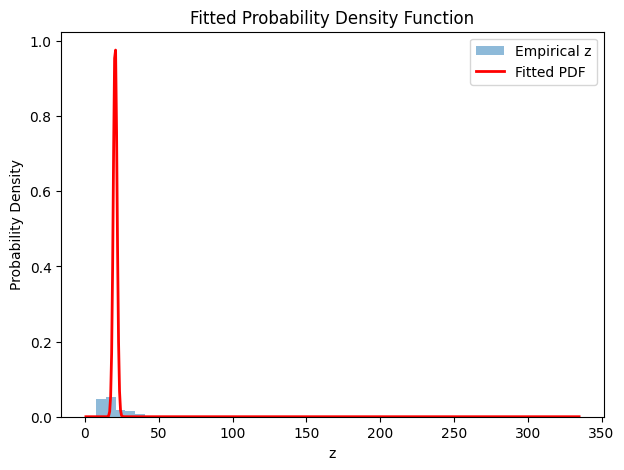

In [17]:
z_range = np.linspace(min(z), max(z), 500)
pdf_fitted = pdf_model(z_range, lambd_hat, mu_hat, c_hat)

plt.figure(figsize=(7,5))
plt.hist(z, bins=50, density=True, alpha=0.5, label="Empirical z")
plt.plot(z_range, pdf_fitted, 'r', linewidth=2, label="Fitted PDF")
plt.xlabel("z")
plt.ylabel("Probability Density")
plt.title("Fitted Probability Density Function")
plt.legend()
plt.show()

In [18]:
print("Estimated Parameters:")
print("Lambda (λ):", lambd_hat)
print("Mu (μ):", mu_hat)
print("c:", c_hat)

Estimated Parameters:
Lambda (λ): 0.30828691010252685
Mu (μ): 20.511011894202323
c: 0.9995253916691093
